## Null hypoth: Something

### Explanation of process

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#create a list of the input files
list_of_stat_files = ['poker_stats.csv', 'ssbm_stats.csv', 'chess_stats.csv', 'tennis_stats.csv', 'pinball_stats.csv']
list_of_rank_files = ['poker_rank_data.csv', 'ssbm_rank_data.csv', 'chess_rank_data.csv', 'tennis_rank_data.csv', 'pinball_rank_data.csv']

#create dataframes to hold the data
stats_df = pd.DataFrame()
rank_df = pd.DataFrame()

In [27]:
#read all the data in the stats files into stats_df
for file in list_of_stat_files:
    temp_df = pd.read_csv(file)
    stats_df = pd.concat([stats_df, temp_df])
    
#read all the data in the rank files into rank_df
for file2 in list_of_rank_files:
    temp_df2 = pd.read_csv(file2)
    rank_df = pd.concat([rank_df, temp_df2])

#### Optional: export all of the data as a single file:

In [28]:
#stats_df.to_csv('all_stats.csv', index=False)
#rank_df.to_csv('all_ranks.csv', index=False)

In [29]:
#create dataframes for each bracket:
top10_df = rank_df[rank_df['RANK'] <= 10].copy()
top25_df = rank_df[rank_df['RANK'] <= 25].copy()
top50_df = rank_df[rank_df['RANK'] <= 50].copy()

In [30]:
#create a list of the three dataframes:
gross_df = [top10_df, top25_df, top50_df]

In [31]:
#for each dataframe in the list, group the content by 'FIELD' and sum the columns:
for i, df in enumerate(gross_df):
    
    #get the absolute value of change
    df['CHANGE'] = df['CHANGE'].abs()
    
    df = df.groupby('FIELD').sum()
    df.reset_index(inplace=True)
    
    #this loop adjusts for PINALL missing a year of data
    for num in range(1,4):
        df.iloc[1, num] = df.iloc[1, num] * 1.2
    
    #get the absolute value of change, normalize it, and round up:
    df['CHANGE'] = df['CHANGE'] / 6
    df['CHANGE'] = df['CHANGE'].apply(np.ceil)
    
    #per person depends on which dataframe we're looking at:
    if i == 0:
        df['AVG_INDIV_CHANGE'] = df['CHANGE'] / 10
    if i == 1:
        df['AVG_INDIV_CHANGE'] = df['CHANGE'] / 25
    if i == 2:
        df['AVG_INDIV_CHANGE'] = df['CHANGE'] / 50
        
    #normalize the new column and round up:
    df['NEW'] = df['NEW'] / 6
    df['NEW'] = df['NEW'].apply(np.ceil)
    
    #return a dataframe with the adjusted values:
    df = df[['FIELD', 'CHANGE', 'AVG_INDIV_CHANGE', 'NEW']]
    
    #rename to clarify column names:
    df.rename(columns={'CHANGE':'AVG_TOTAL_CHANGE', 'NEW':'AVG_TOTAL_NEWCOMERS'}, inplace=True)
    gross_df[i] = df

### Interpreting the data:

In [32]:
#Let's start by reviewing the dataframe for the top 50...
gross_df[2]

,FIELD,AVG_TOTAL_CHANGE,AVG_INDIV_CHANGE,AVG_TOTAL_NEWCOMERS
0,CHESS,555.0,11.10,2.0
1,PINBALL,613.0,12.26,2.0
2,POKER,1714.0,34.28,15.0
3,SSBM,817.0,16.34,6.0
4,TENNIS,1018.0,20.36,5.0


#### How do you interpret 'Change'?
- **CHANGE** - The annual average of the collective movement (player movement up or down) for a given field/bracket.
    - Example: *SSBM has, on average, 817 points of player movement in their top 50 each year.*
    - Note: movement can occur in either direction--a player climbing two spots (+2) is weighted the same as someone falling two spots (-2).

- Breaking down change per person for SSBM, we see that the **average annual change per person** is 16.34; this doesn't mean that every single person in the top 50 moved 16 spots up or down, but rather gives us a general idea of what the group's average movement is like each year.

#### What about new players?
- **NEW** - The appearance of a **previously unranked player** entering the rankings at the provided field/bracket.
    - Example: we see that, on average, there are 15 new (previously unranked) players that join the top 50 rankings for Poker every year. By comparison, we see that Chess on average only has two unranked players make their first appearence in the top 50 ranks of each year.
    - Interpreting the example: *Chess players aren't as likely as Poker players to make their first ranked appearence in the top 50 of the charts; they're more likely to be ranked elsewhere (potentially 51-100, or 100+) before gradually working their way into the top 50.*

## Plotting the data:

<BarContainer object of 5 artists>

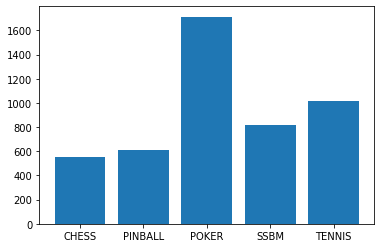

In [33]:
#Plotting the average change for all ranking players in the top 50:
plt.bar(gross_df[2]['FIELD'], gross_df[2]['AVG_TOTAL_CHANGE'])

<BarContainer object of 5 artists>

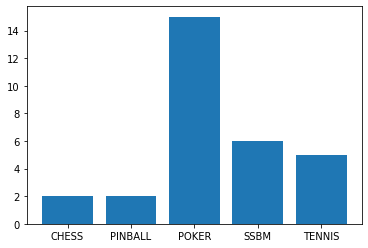

In [34]:
#Plotting the average number of total newcomers in the top 50:
plt.bar(gross_df[2]['FIELD'], gross_df[2]['AVG_TOTAL_NEWCOMERS'])

In [35]:
year_filter = [2019, 2018, 2017]

In [36]:
filtered_df = top50_df[top50_df.YEAR.isin(year_filter)].copy()

In [37]:
filtered_df

,FIELD,YEAR,PLAYER,RANK,CHANGE,NEW,SPEC_SCORE
0,POKER,2019,Stephen Chidwick,1,2.0,False,"3,687.58 pts"
1,POKER,2019,William Alex Foxen,2,1.0,False,"3,595.96 pts"
2,POKER,2019,Anthony Zinno,3,16.0,False,"3,387.21 pts"
3,POKER,2019,Sean Winter,4,59.0,False,"3,379.65 pts"
4,POKER,2019,Manig Loeser,5,23.0,False,"3,369.95 pts"
...,...,...,...,...,...,...,...
345,PINBALL,2017,Alberto Santana,46,55.0,True,1635.29
346,PINBALL,2017,Colin MacAlpine,47,17.0,False,1875.96
347,PINBALL,2017,Joe Lemire,48,17.0,False,1797.89
348,PINBALL,2017,Erwin Deutschländer,49,52.0,True,1561.38


In [55]:
new_sum = filtered_df.groupby(['FIELD', 'YEAR']).sum()

In [56]:
new_sum.drop(columns=['RANK', 'CHANGE'], axis=1, inplace=True)

In [57]:
avg_change = filtered_df.groupby(['FIELD', 'YEAR']).mean()

In [58]:
avg_change.drop(columns=['RANK', 'NEW'], axis=1, inplace=True)

In [59]:
combined_df = avg_change.merge(new_sum, on=['FIELD', 'YEAR'])

In [61]:
combined_df.reset_index(inplace=True)

In [64]:
combined_df.rename(columns={"CHANGE":"AVG_CHANGE", "NEW":"NEW_CT"}, inplace=True)

In [70]:
combined_df

,FIELD,YEAR,AVG_CHANGE,NEW_CT
0,CHESS,2017,12.56,2.0
1,CHESS,2018,11.42,1.0
2,CHESS,2019,12.80,4.0
3,PINBALL,2017,16.74,7.0
4,PINBALL,2018,17.56,4.0
5,PINBALL,2019,8.64,0.0
6,POKER,2017,32.18,16.0
7,POKER,2018,37.94,16.0
8,POKER,2019,31.94,12.0
9,SSBM,2017,16.14,6.0
